# Baseline models for the Palmer Penguins dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
from sklearn.preprocessing import LabelEncoder

In [3]:
# setting up plot style

import matplotlib.font_manager as fm

path_to_public_sans = fm.findfont('Public Sans')
public_sans = fm.FontProperties(fname=path_to_public_sans)

sns.set_style("whitegrid")
plt.rcParams['font.family'] = public_sans.get_name()  # Register the font by its internal name
plt.rcParams['font.size'] = 12

# set figure size to 14, 6 in rcparams
plt.rcParams['figure.figsize'] = 14, 6
plt.rcParams['figure.dpi'] = 600
plt.rcParams['figure.facecolor'] = '#f7f6f2'
plt.rcParams['axes.facecolor'] = '#f7f6f2'
plt.rcParams['xtick.major.width'] = 0.5
plt.rcParams['ytick.major.width'] = 0.5
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = 'grey'
plt.rcParams['grid.alpha'] = 0.55
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 0.2
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=["#095859"])

# xtick text size
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

In [4]:
penguin_data = pd.read_csv("../datasets/palmer-penguins/penguins_medium_imbalance.csv")

## EDA

Exploring class imbalance:

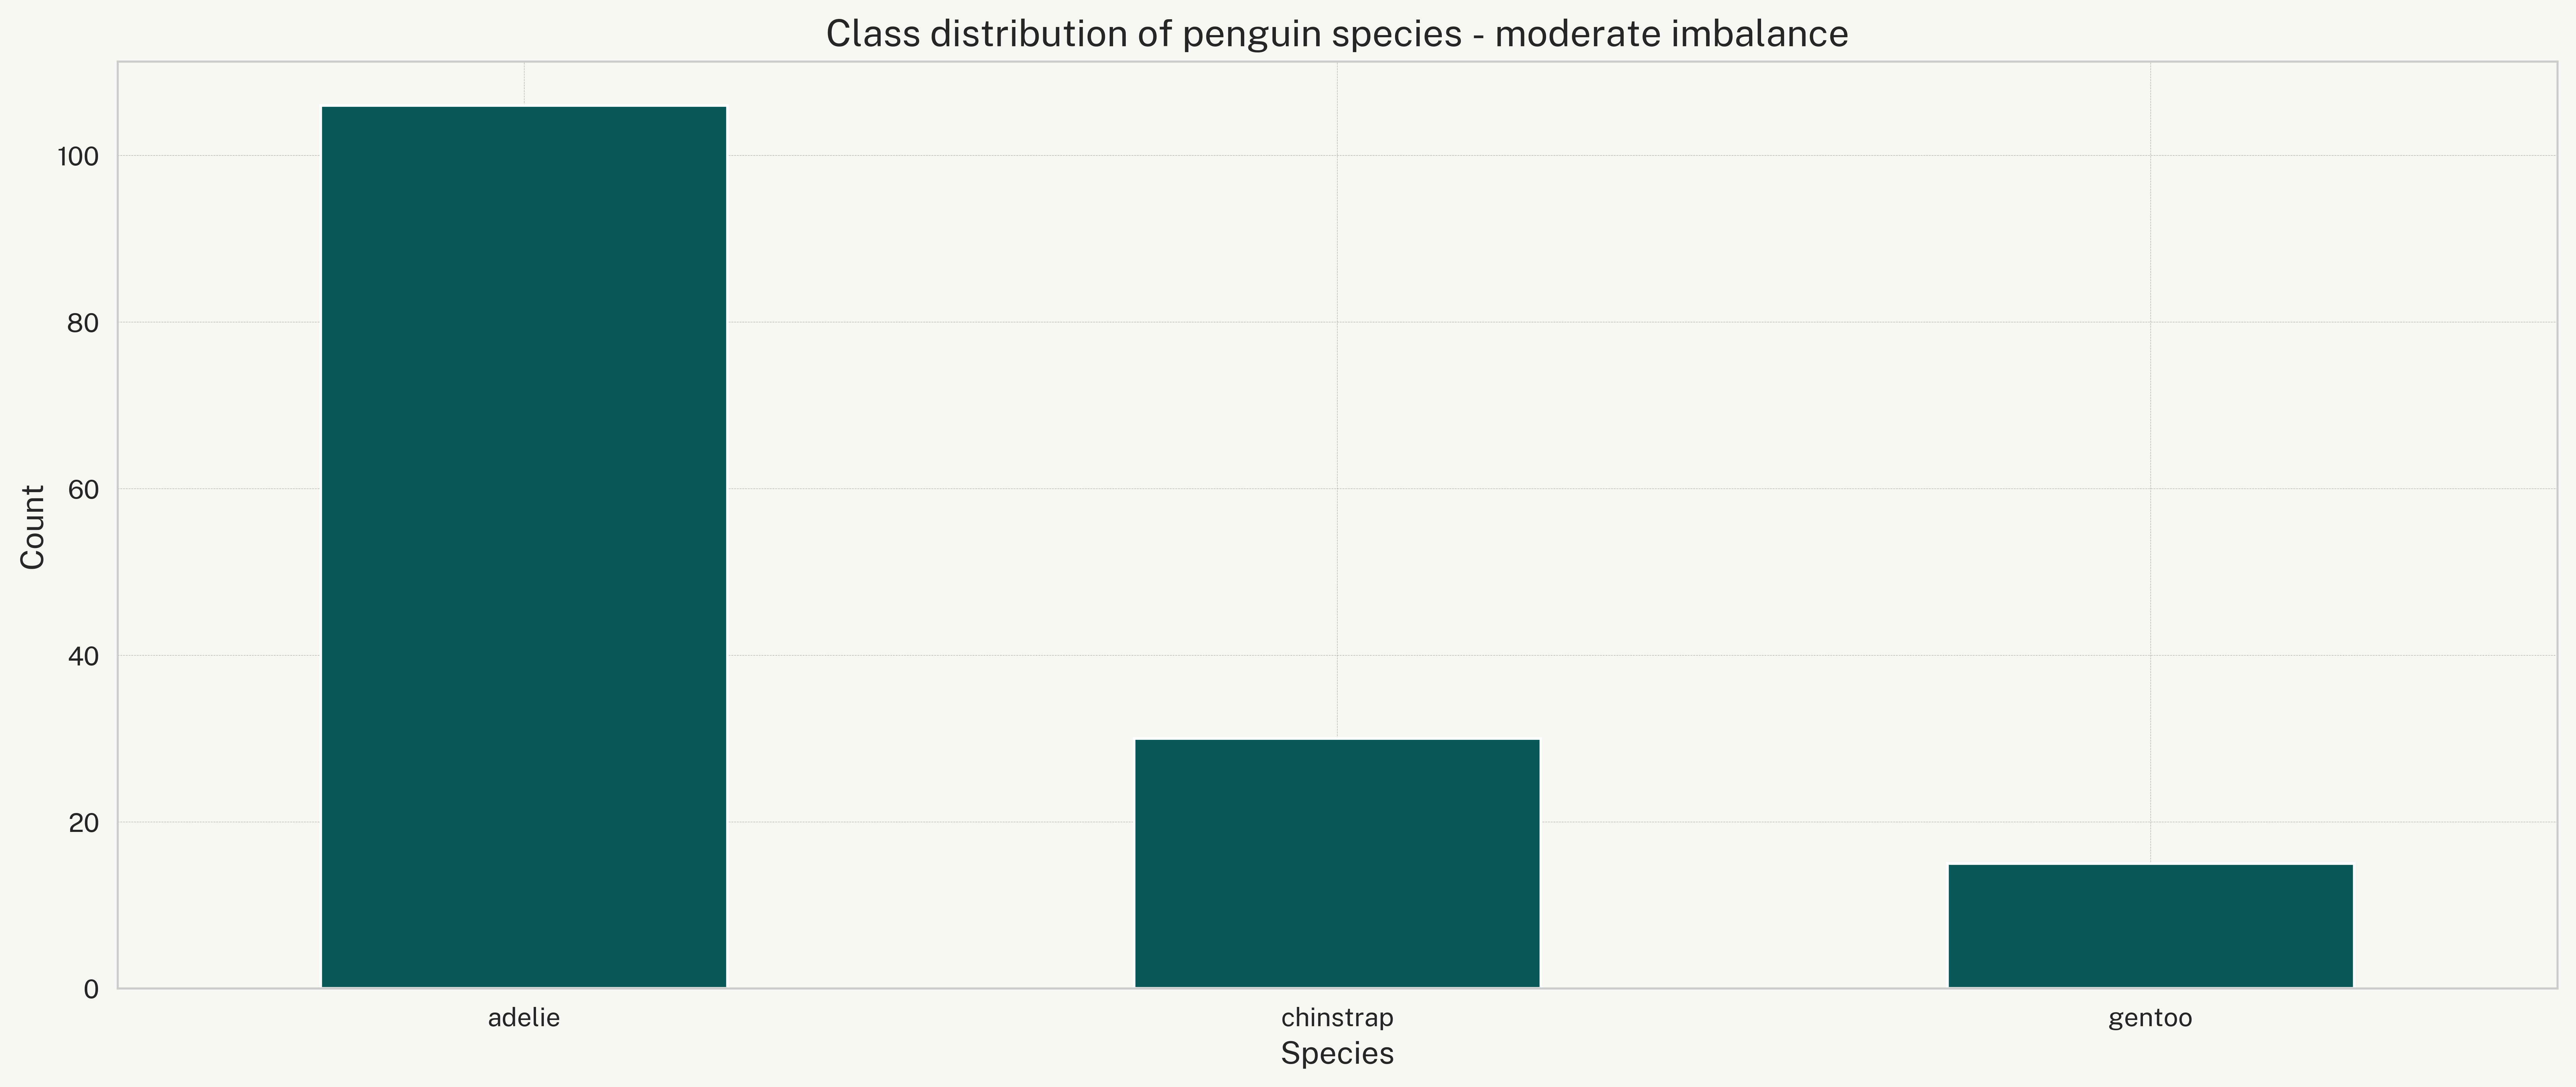

In [5]:
penguin_data['species'].value_counts().plot(kind='bar')
plt.title("Class distribution of penguin species - moderate imbalance")
plt.xlabel("Species")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [6]:
penguin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            151 non-null    object 
 1   island             151 non-null    object 
 2   culmen_length_mm   150 non-null    float64
 3   culmen_depth_mm    150 non-null    float64
 4   flipper_length_mm  150 non-null    float64
 5   body_mass_g        150 non-null    float64
 6   sex                145 non-null    object 
dtypes: float64(4), object(3)
memory usage: 8.4+ KB


We can now take a look at the continuous features as well.

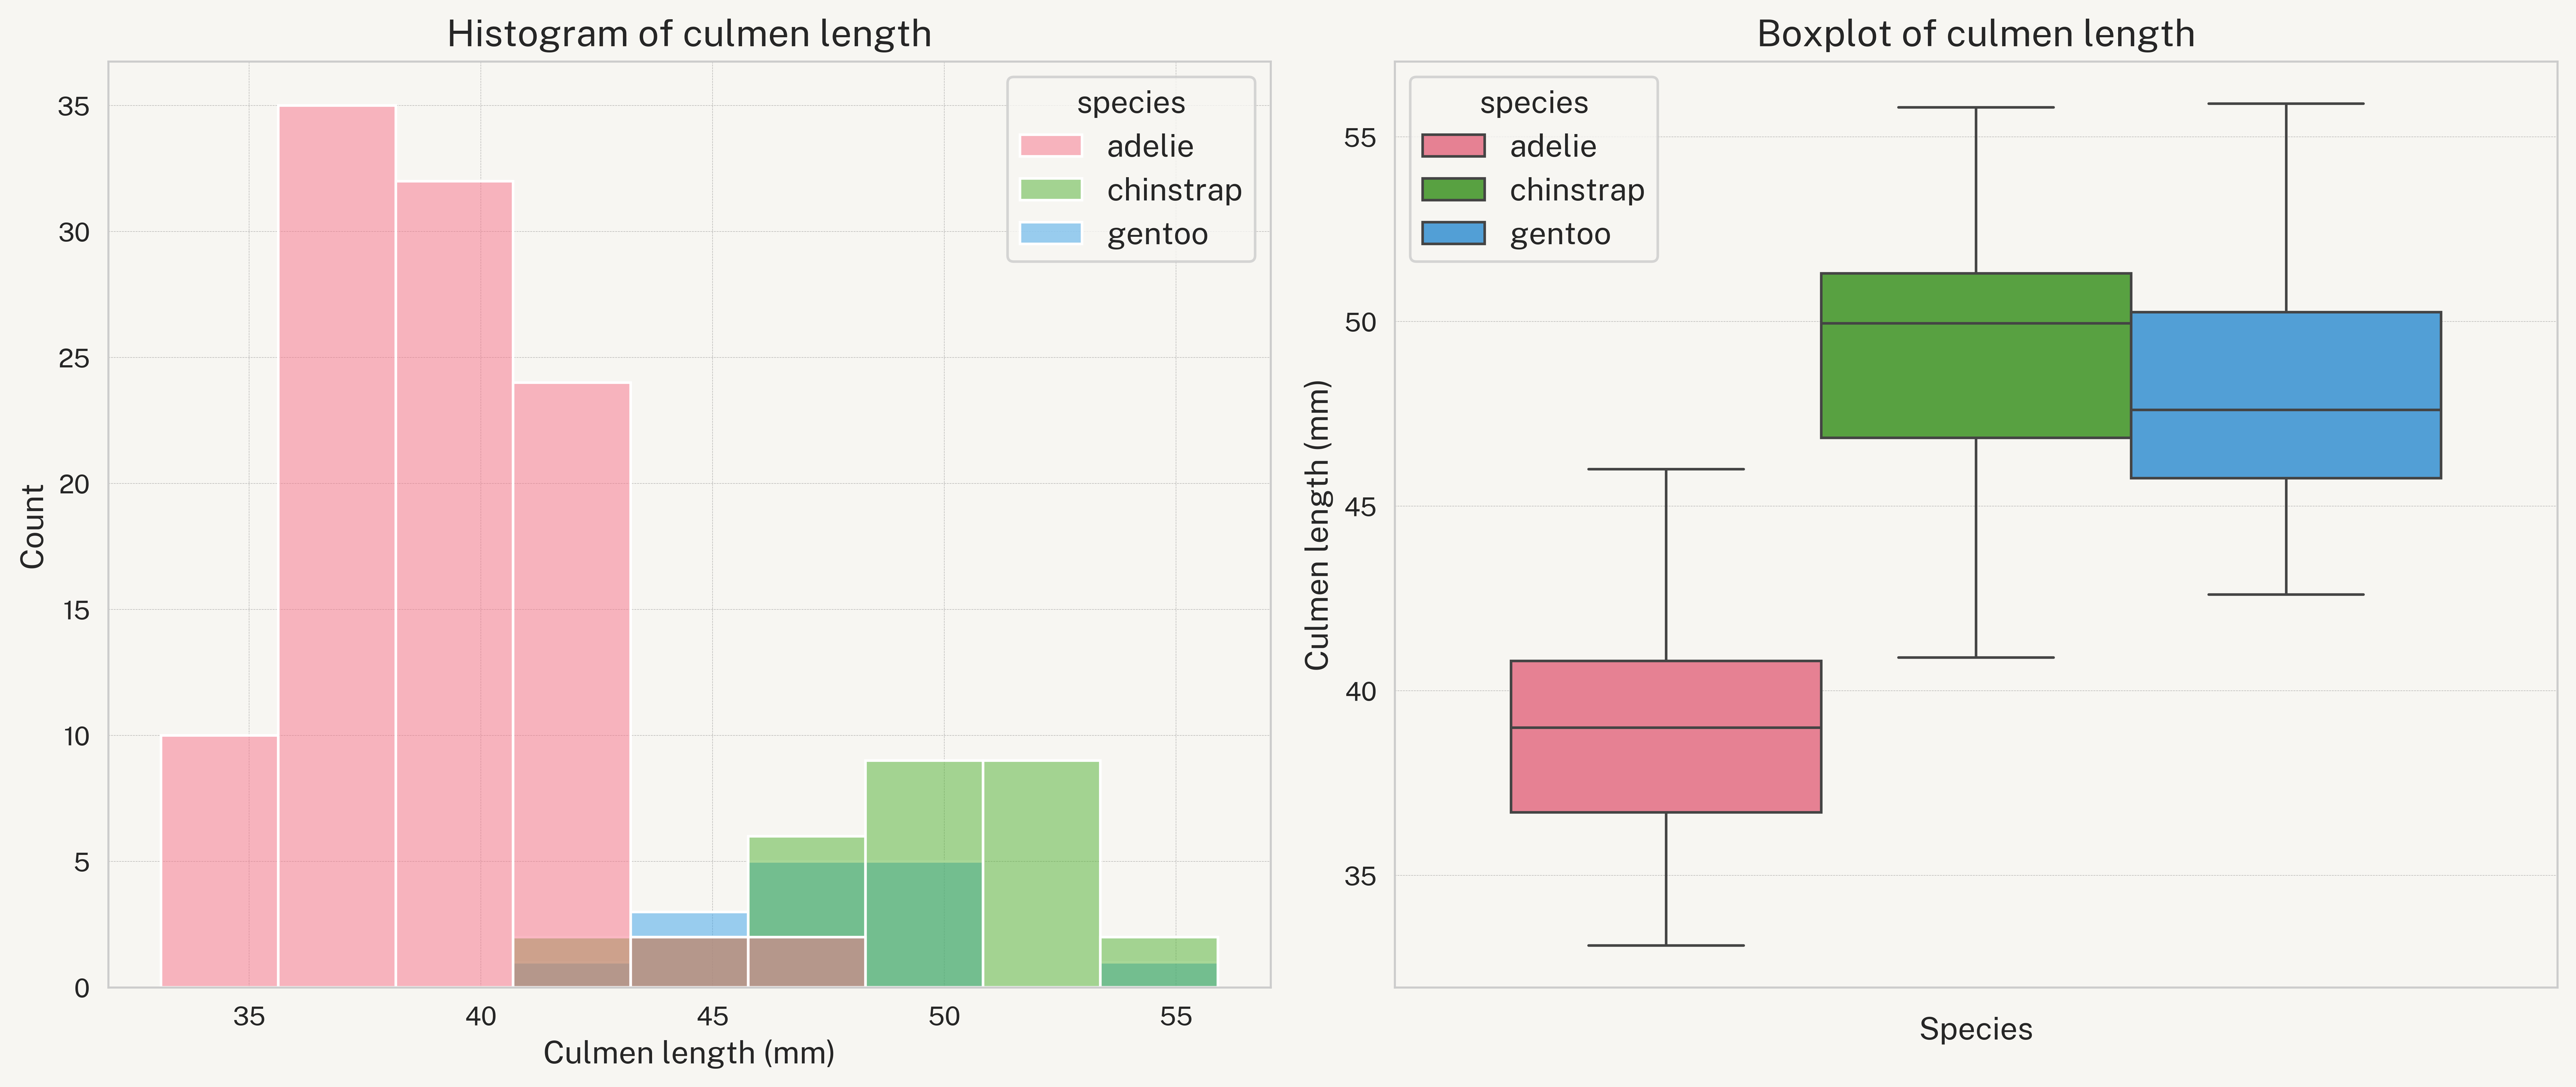

In [7]:
# histogram and boxplot of culmen length by species
fig, ax = plt.subplots(1, 2)
sns.histplot(data=penguin_data, x="culmen_length_mm", ax=ax[0], hue="species")
ax[0].set_xlabel("Culmen length (mm)")
ax[0].set_title("Histogram of culmen length")

sns.boxplot(y='culmen_length_mm', data=penguin_data, ax=ax[1], hue="species")
ax[1].set_ylabel("Culmen length (mm)")
ax[1].set_xlabel("Species")
ax[1].set_title("Boxplot of culmen length")

plt.tight_layout()
plt.show()

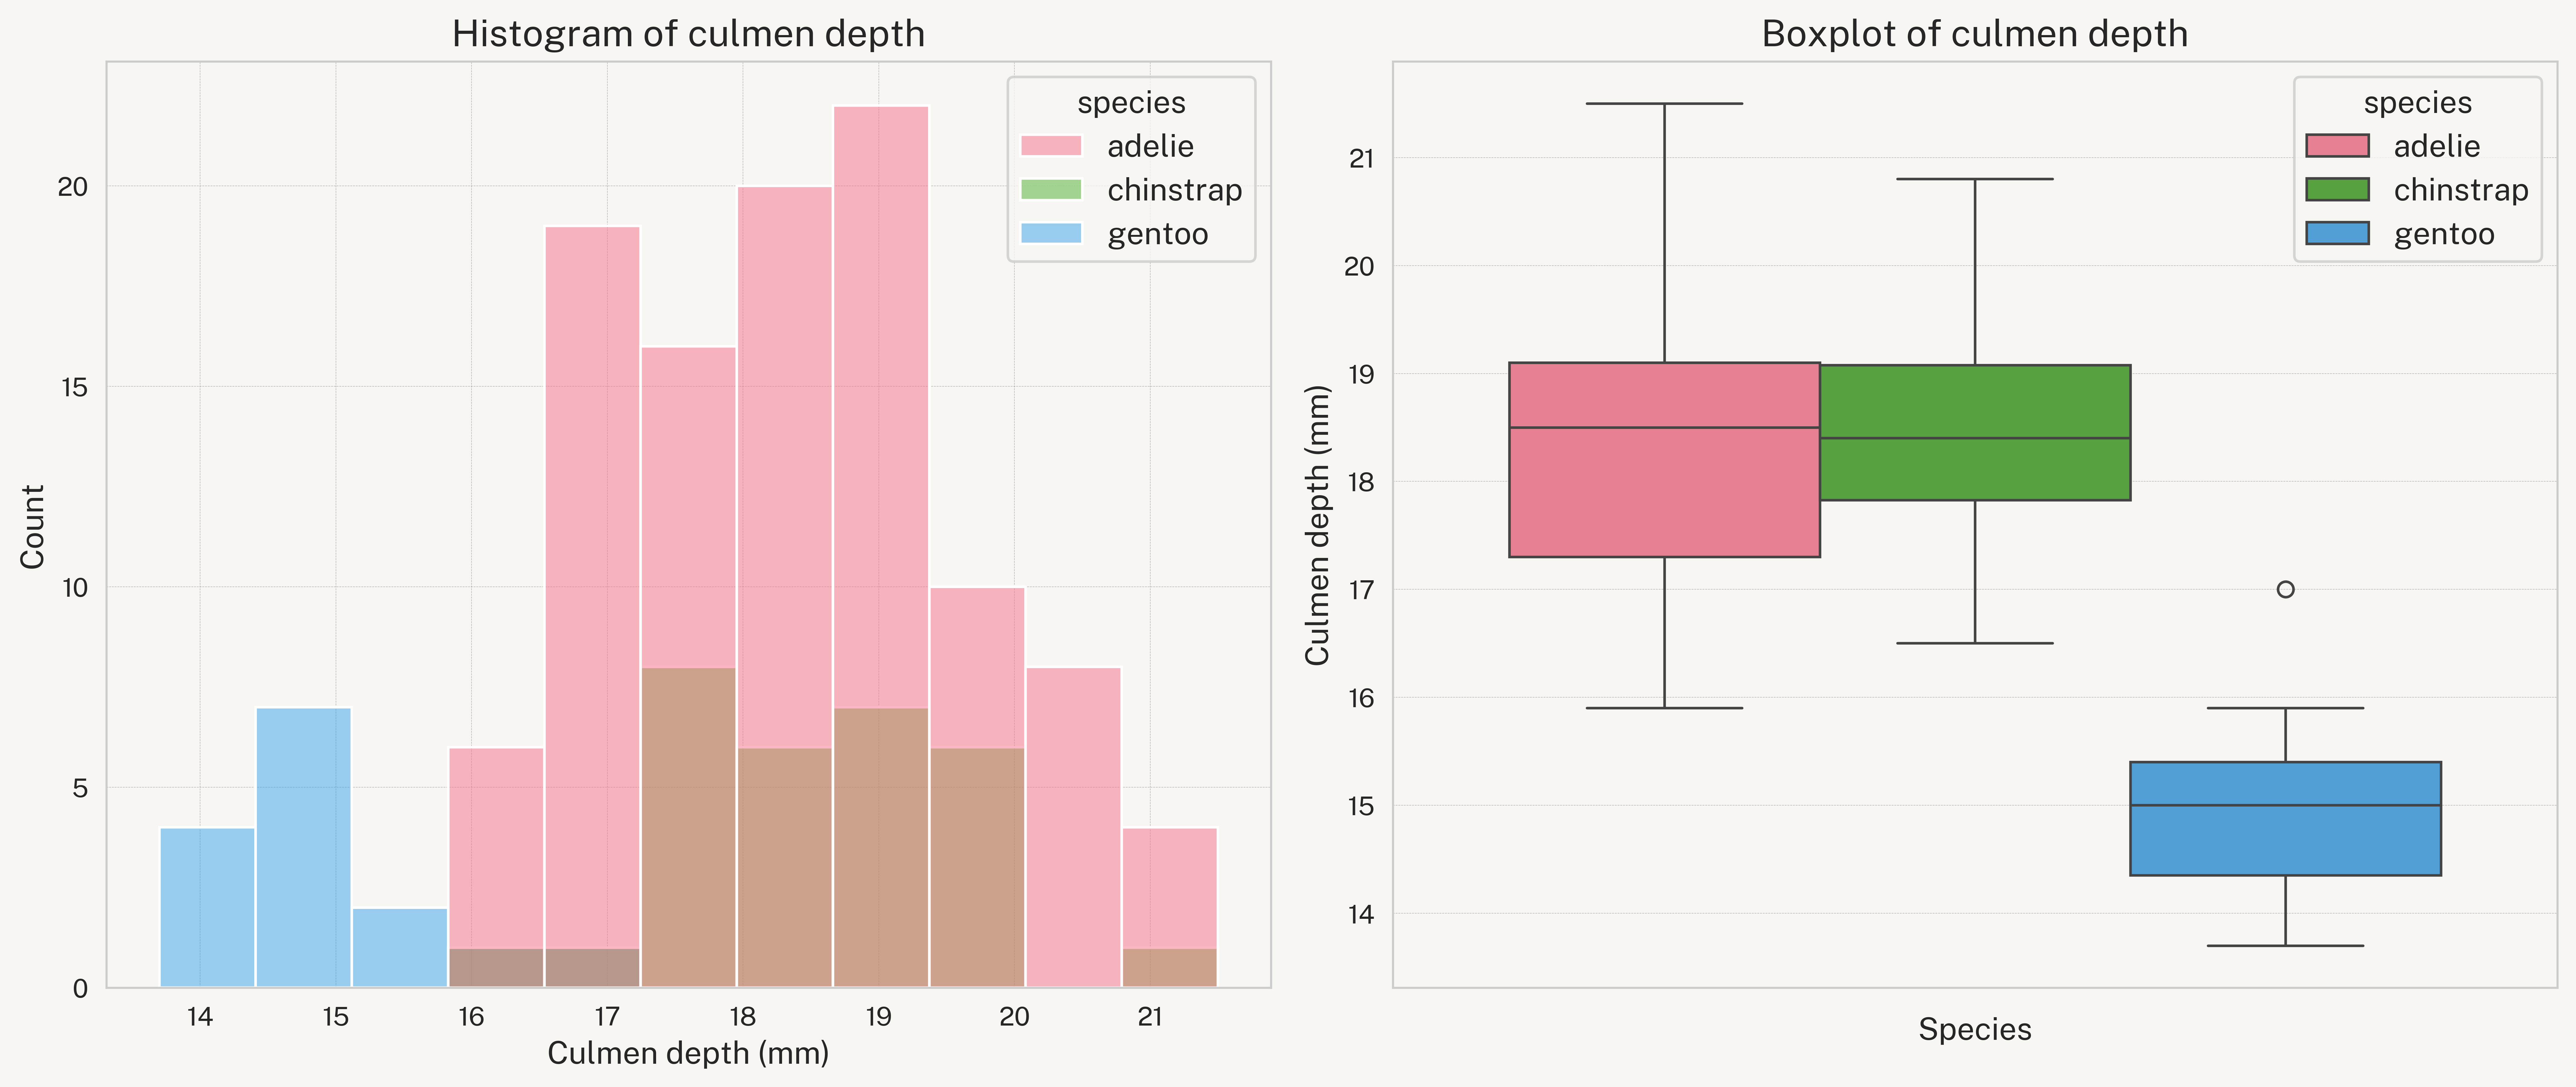

In [8]:
# histogram and boxplot of culmen depth by species
fig, ax = plt.subplots(1, 2)
sns.histplot(data=penguin_data, x="culmen_depth_mm", ax=ax[0], hue="species")
ax[0].set_xlabel("Culmen depth (mm)")
ax[0].set_title("Histogram of culmen depth")

sns.boxplot(y='culmen_depth_mm', data=penguin_data, ax=ax[1], hue="species")
ax[1].set_ylabel("Culmen depth (mm)")
ax[1].set_xlabel("Species")
ax[1].set_title("Boxplot of culmen depth")

plt.tight_layout()
plt.show()

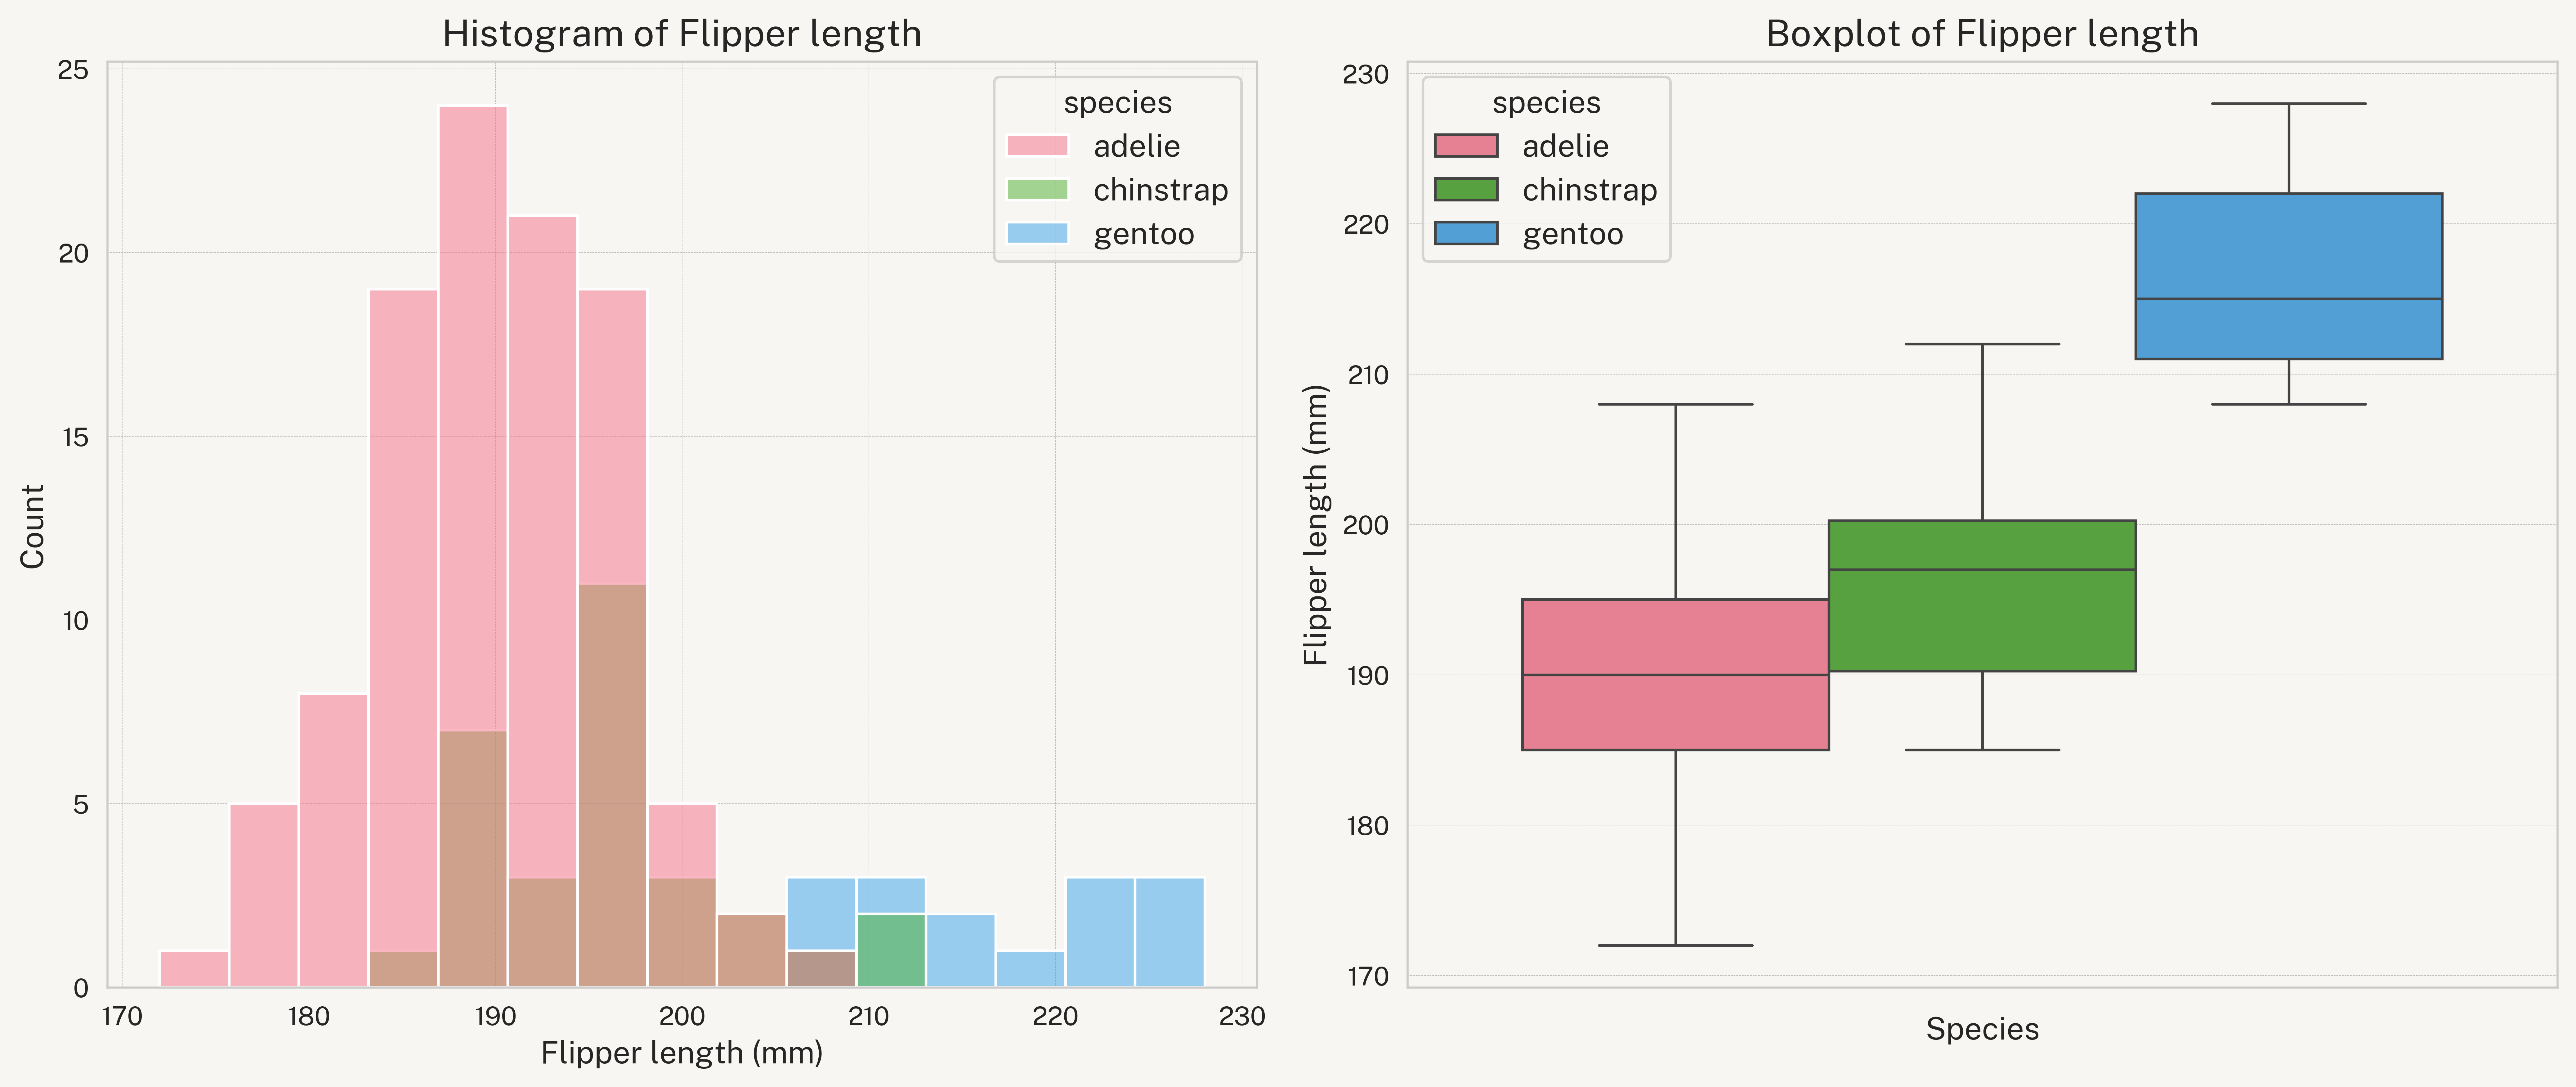

In [9]:
# histogram and boxplot of culmen length by species
fig, ax = plt.subplots(1, 2)
sns.histplot(data=penguin_data, x="flipper_length_mm", ax=ax[0], hue="species")
ax[0].set_xlabel("Flipper length (mm)")
ax[0].set_title("Histogram of Flipper length")

sns.boxplot(y='flipper_length_mm', data=penguin_data, ax=ax[1], hue="species")
ax[1].set_ylabel("Flipper length (mm)")
ax[1].set_xlabel("Species")
ax[1].set_title("Boxplot of Flipper length")

plt.tight_layout()
plt.show()

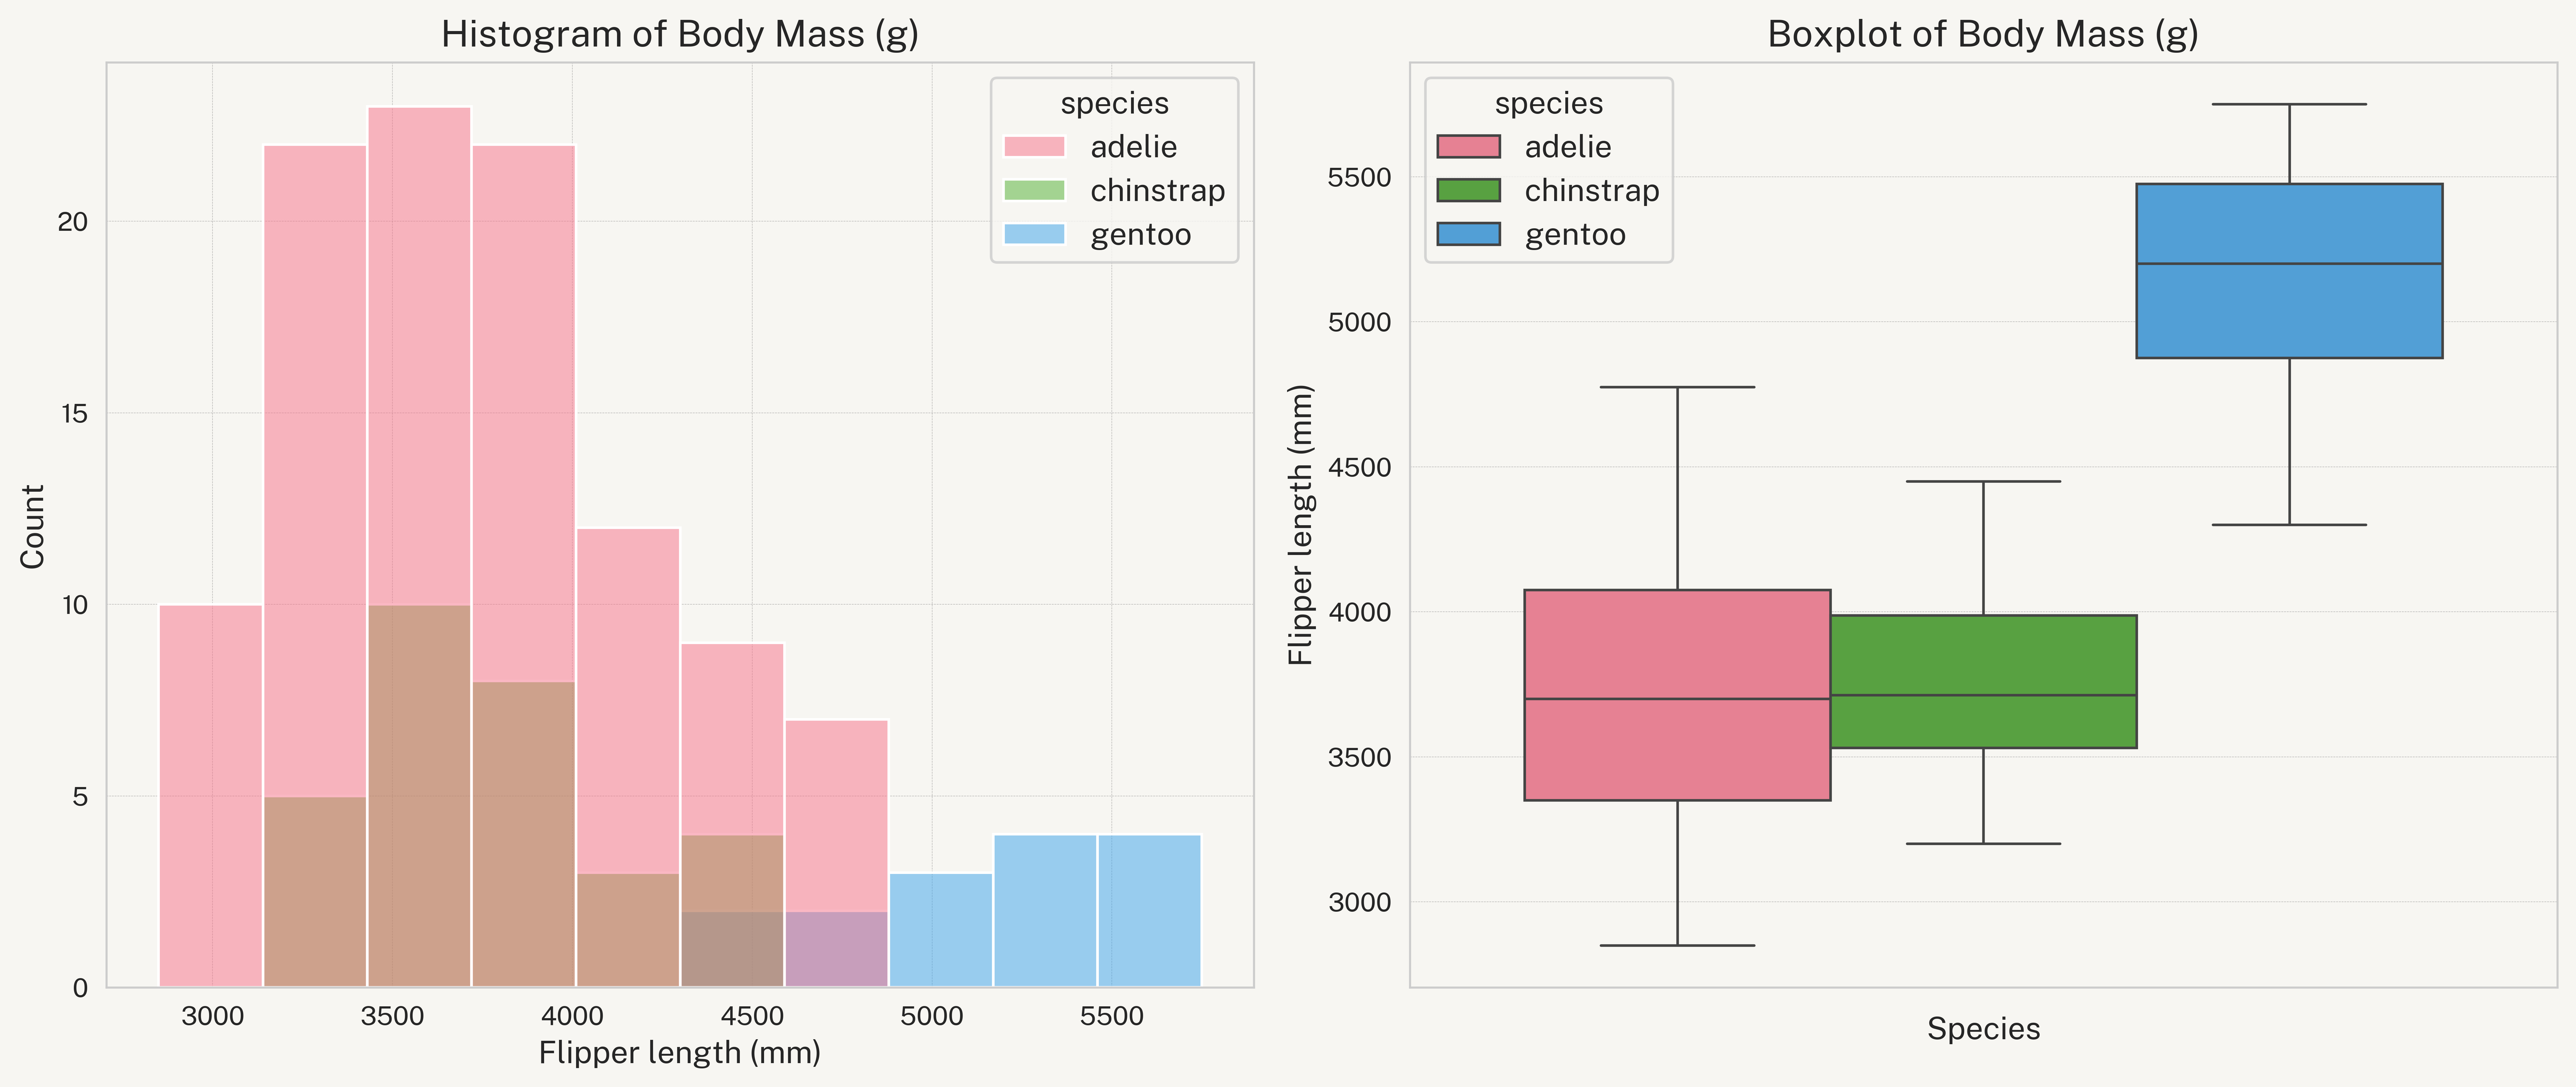

In [10]:
# histogram and boxplot of culmen length by species
fig, ax = plt.subplots(1, 2)
sns.histplot(data=penguin_data, x="body_mass_g", ax=ax[0], hue="species")
ax[0].set_xlabel("Flipper length (mm)")
ax[0].set_title("Histogram of Body Mass (g)")

sns.boxplot(y='body_mass_g', data=penguin_data, ax=ax[1], hue="species")
ax[1].set_ylabel("Flipper length (mm)")
ax[1].set_xlabel("Species")
ax[1].set_title("Boxplot of Body Mass (g)")

plt.tight_layout()
plt.show()

# Dealing with missing values

In [11]:
# missing values
penguin_data.isnull().sum()

species              0
island               0
culmen_length_mm     1
culmen_depth_mm      1
flipper_length_mm    1
body_mass_g          1
sex                  6
dtype: int64

### Impute data for numerical columns using a SimpleImputer

In [12]:
# simple imputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
penguin_data_imputed = imputer.fit_transform(penguin_data)

penguin_data_imputed = pd.DataFrame(penguin_data_imputed, columns=penguin_data.columns)

In [13]:
penguin_data_imputed.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

# Baseline Dummy Classifier, Logistic Regression and Random Forest models 

In [14]:
# label encoding species and one-hot encoding island
label_encoder = LabelEncoder()
penguin_data_imputed['species'] = label_encoder.fit_transform(penguin_data_imputed['species'])
penguin_data_imputed = pd.get_dummies(penguin_data_imputed, columns=['island', 'sex'], drop_first=True, dtype=int)

In [15]:
penguin_data_imputed.head()

species culmen_length_mm culmen_depth_mm flipper_length_mm body_mass_g  \
0        0             35.9            16.6             190.0      3050.0   
1        0             36.6            18.4             184.0      3475.0   
2        0             38.1            18.6             190.0      3700.0   
3        0             36.7            18.8             187.0      3800.0   
4        0             41.1            17.5             190.0      3900.0   

   island_dream  island_torgersen  sex_male  
0             0                 1         0  
1             1                 0         0  
2             1                 0         0  
3             0                 1         0  
4             1                 0         1

## Creating train-test splits

Before we proceed to scale/normalize our data, we need to create our training and testing sets. The Scaler we used will be `fit_transform`ed using the training set, and the "fit" distribution statistics that will be obtained using the training set will also used to treat the test set similarly. The idea is that both sets originate from the same distribution, so scaling should be similar, and scaling them separately _after_ splitting may cause some drift between the results obtained.

In [16]:
# train test split
X = penguin_data_imputed.drop('species', axis=1)
y = penguin_data_imputed['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling using the StandardScaler

In [17]:
cols_to_scale = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [18]:
# Dummy classifier
from sklearn.dummy import DummyClassifier

# Initialize the DummyClassifier with the most_frequent strategy
dummy_clf = DummyClassifier(strategy='most_frequent')

# Fit the classifier on the training data
dummy_clf.fit(X_train, y_train)

# Predict on the test data
y_pred_dummy = dummy_clf.predict(X_test)

# Evaluate the performance
print("Dummy Classifier (Most Frequent) Performance:")
print(classification_report(y_test, y_pred_dummy))
print("Accuracy:", accuracy_score(y_test, y_pred_dummy))

Dummy Classifier (Most Frequent) Performance:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        22
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         4

    accuracy                           0.71        31
   macro avg       0.24      0.33      0.28        31
weighted avg       0.50      0.71      0.59        31

Accuracy: 0.7096774193548387


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [19]:
# Initialize and fit the logistic regression model
log_reg = LogisticRegression(max_iter=2000, solver='saga')
log_reg.fit(X_train, y_train)

# Predict on the test data
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the performance
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log_reg))
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         4

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31

Accuracy: 1.0


In [25]:
# Random forest model

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, random_state=1205, max_depth=5)
random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred_rf))

Accuracy:  1.0


In [23]:
from sklearn.model_selection import cross_val_score

# log reg cross validation with log_reg object above
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')
print("Logistic Regression Cross Validation Accuracy: ", cv_scores.mean())


Logistic Regression Cross Validation Accuracy:  0.9916666666666668


In [26]:
cross_val_score(random_forest, X_train, y_train, cv=5, scoring='accuracy').mean()

0.975

## Todo
1. Identify root cause of non-convergence of models - why does only cross-validation seem to work?
2. Create pipeline for scaling, normalizing, splitting and testing